# Ninad Karlekar
## OIBSIP May Task 3

## Life cycle of Data Science Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Model Training
- Choose best model

## 1) Problem statement

### Car Price prediction
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

## 2) Data Collection

- Dataset Source -
https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv

### 2.1 Import Required Packages

In [53]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import seaborn as sns

In [54]:
import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing datasets

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


### 2.3 Dataset information

- **car_ID**: Unique identifier for each car entry.
- **symboling**: Insurance risk rating assigned to the car (-3 to +3), where higher values indicate a higher risk.
- **CarName**: Name of the car model.
- **fueltype**: Type of fuel used by the car (e.g., "gas" or "diesel").
- **aspiration**: Type of aspiration system in the car (e.g., "std" or "turbo").
- **doornumber**: Number of doors on the car (e.g., "two" or "four").
- **carbody**: Body type of the car (e.g., "sedan", "hatchback", "wagon", "convertible", "hardtop").
- **drivewheel**: Type of drivetrain in the car (e.g., "fwd" for front-wheel drive, "rwd" for rear-wheel drive, "4wd" for four-wheel drive).
- **enginelocation**: Location of the car's engine (e.g., "front" or "rear").
- **wheelbase**: Distance between the centers of the front and rear wheels.
- **carlength**: Length of the car in units of measurement.
- **carwidth**: Width of the car in units of measurement.
- **carheight**: Height of the car in units of measurement.
- **curbweight**: Weight of the car without occupants or luggage.
- **enginetype**: Type of engine used in the car (e.g., "dohc", "ohc", "l", "rotor", etc.).
- **cylindernumber**: Number of cylinders in the car's engine.
- **enginesize**: Size of the car's engine in cubic centimeters (cc).
- **fuelsystem**: Fuel delivery system used in the car (e.g., "mpfi", "2bbl", "idi", etc.).
- **boreratio**: Ratio of the cylinder bore diameter to the piston stroke length.
- **stroke**: Length of the piston stroke in the car's engine.
- **compressionratio**: Compression ratio of the car's engine.
- **horsepower**: Power generated by the car's engine in horsepower.
- **peakrpm**: Maximum revolutions per minute (RPM) at which the car's engine operates efficiently.
- **citympg**: Fuel efficiency measured in miles per gallon (MPG) in city driving conditions.
- **highwaympg**: Fuel efficiency measured in miles per gallon (MPG) in highway driving conditions.
- **price**: Price of the car.

<br>

## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [57]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**There are no missing values in the data set**

### 3.2 Check Duplicates

In [58]:
df.duplicated().sum()

0

### 3.3 Check data types

In [59]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### 3.4 Checking the number of unique values of each column

In [60]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### 3.5 Check statistics of data set

In [61]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Let's get stastical information about the dataset

In [62]:
#number of rows and columns
df.shape

(205, 26)

### 3.6 Exploring Data

In [63]:
print("Categories in 'symboling' variable:     ",end=" " )
print(df['symboling'].unique())



print("Categories in 'fueltype' variable:     ",end=" " )
print(df['fueltype'].unique())

print("Categories in 'aspiration' variable:     ",end=" " )
print(df['aspiration'].unique())

print("Categories in 'doornumber' variable:     ",end=" " )
print(df['doornumber'].unique())

print("Categories in 'carbody' variable:     ",end=" " )
print(df['carbody'].unique())

print("Categories in 'drivewheel' variable:     ",end=" " )
print(df['drivewheel'].unique())

print("Categories in 'enginelocation' variable:     ",end=" " )
print(df['enginelocation'].unique())

print("Categories in 'enginetype' variable:     ",end=" " )
print(df['enginetype'].unique())

print("Categories in 'cylindernumber' variable:     ",end=" " )
print(df['cylindernumber'].unique())

print("Categories in 'fuelsystem' variable:     ",end=" " )
print(df['fuelsystem'].unique())



Categories in 'symboling' variable:      [ 3  1  2  0 -1 -2]
Categories in 'fueltype' variable:      ['gas' 'diesel']
Categories in 'aspiration' variable:      ['std' 'turbo']
Categories in 'doornumber' variable:      ['two' 'four']
Categories in 'carbody' variable:      ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Categories in 'drivewheel' variable:      ['rwd' 'fwd' '4wd']
Categories in 'enginelocation' variable:      ['front' 'rear']
Categories in 'enginetype' variable:      ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Categories in 'cylindernumber' variable:      ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Categories in 'fuelsystem' variable:      ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [64]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.
      format(len(numeric_features), numeric_features))

print('\nWe have {} categorical features : {}'.
      format(len(categorical_features), categorical_features))

We have 16 numerical features : ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

We have 10 categorical features : ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


## 4. EDA (Visualization)

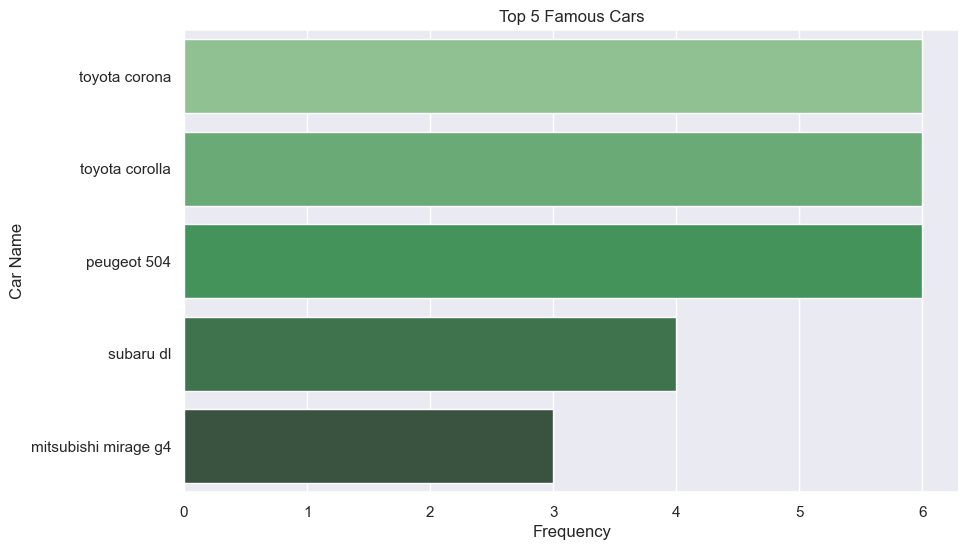

In [65]:
# Get the top 5 most frequent CarName values
top_5_cars = df['CarName'].value_counts().head(5)

# Create a DataFrame with CarName and Frequency columns
top_5_cars_df = pd.DataFrame({'Car Name': top_5_cars.index,
                              'Frequency': top_5_cars.values})

# Create a horizontal bar chart using Seaborn
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Car Name', 
            data=top_5_cars_df, palette='Greens_d')
plt.title('Top 5 Famous Cars')
plt.xlabel('Frequency')
plt.ylabel('Car Name')
plt.show()

### 4.2 Feature Wise Visualization

#### 4.2.1 fueltype COLUMN

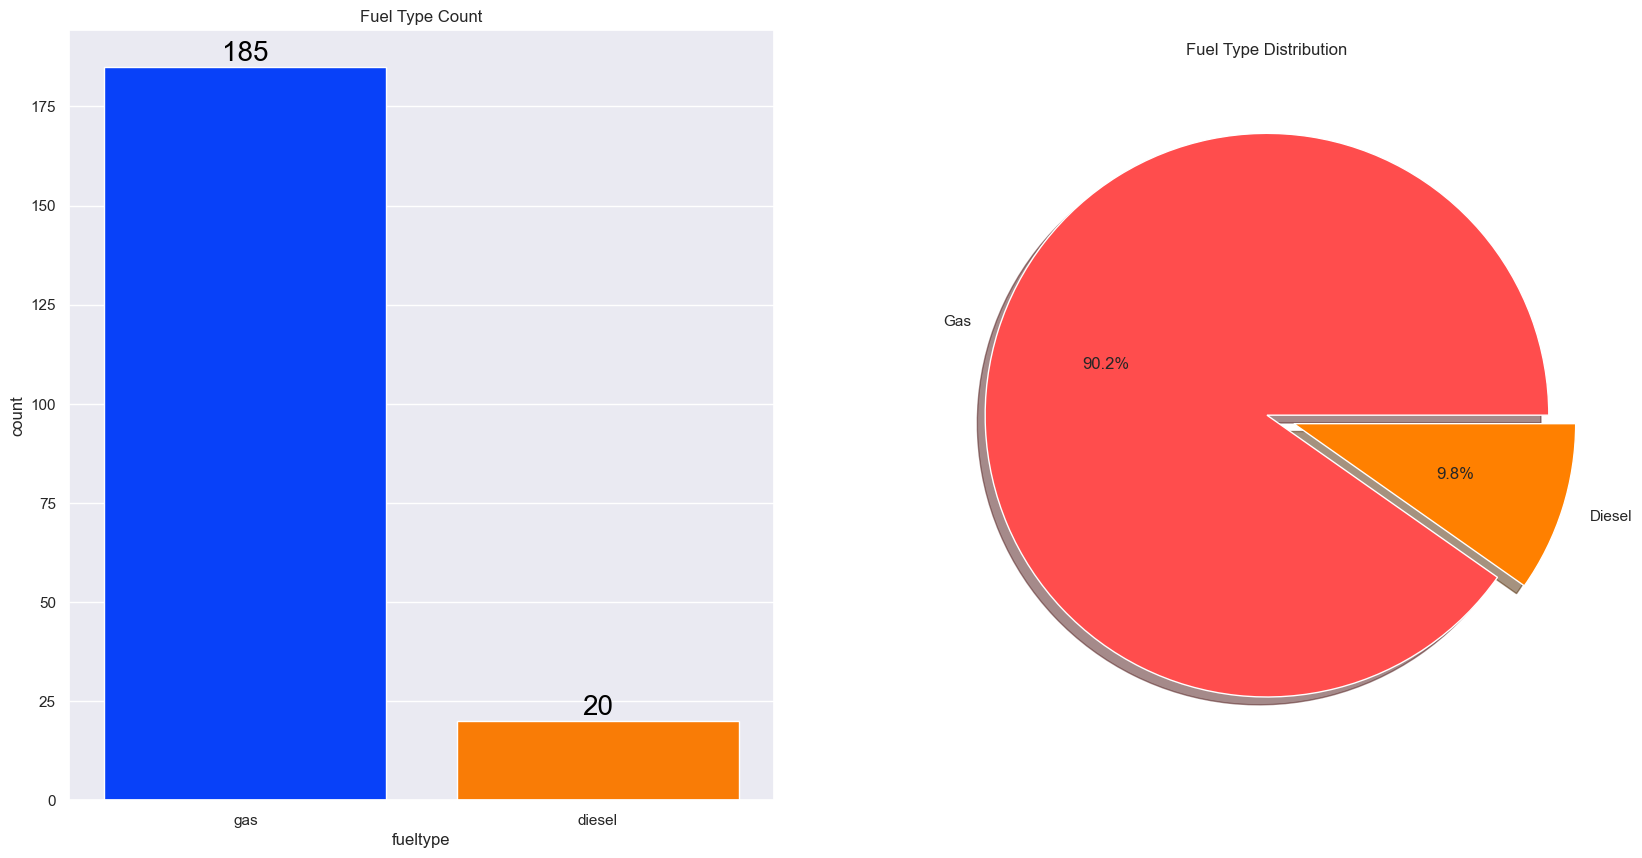

In [66]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the count of each fueltype using a countplot
sns.countplot(x='fueltype', data=df, palette='bright',
              ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot a pie chart for the distribution of fueltype
ax[1].pie(x=df['fueltype'].value_counts(),
          labels=['Gas', 'Diesel'],
          explode=[0, 0.1],
          autopct='%1.1f%%',
          shadow=True, colors=['#ff4d4d', '#ff8000'])

# Set titles for the subplots
ax[0].set_title('Fuel Type Count')
ax[1].set_title('Fuel Type Distribution')

# Display the plot
plt.show()

#### 4.2.1 carbody COLUMN

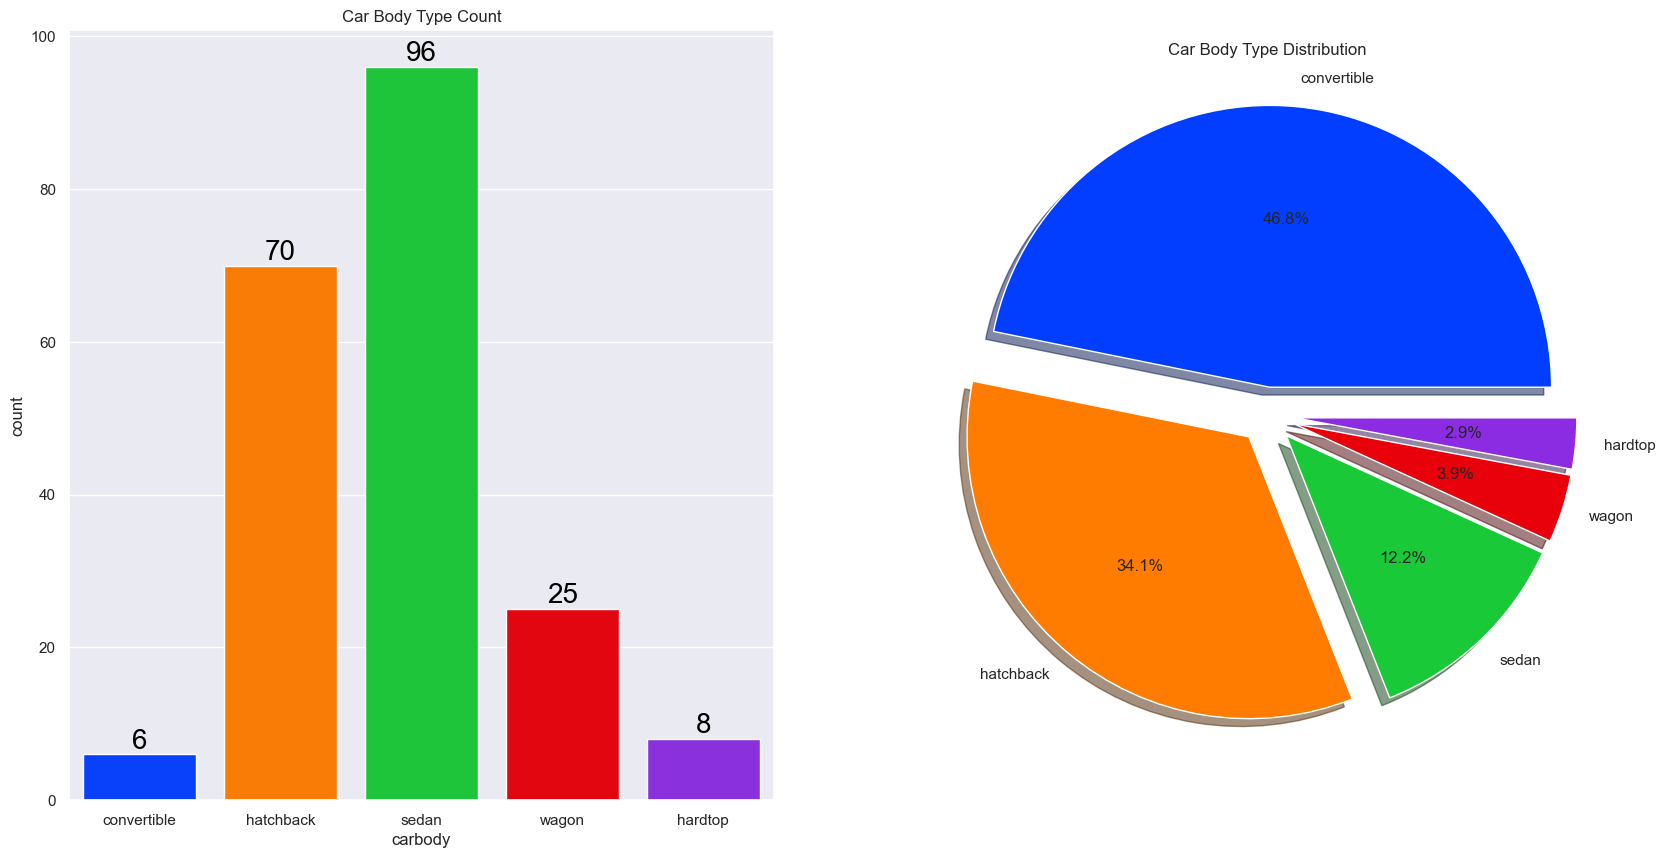

In [67]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the count of each carbody using a countplot
sns.countplot(x='carbody', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot a pie chart for the distribution of carbody
ax[1].pie(x=df['carbody'].value_counts(),
          labels=df['carbody'].unique(), 
          explode=[0.1] * len(df['carbody'].unique()), 
          autopct='%1.1f%%', shadow=True,
          colors=sns.color_palette('bright'))

# Set titles for the subplots
ax[0].set_title('Car Body Type Count')
ax[1].set_title('Car Body Type Distribution')

# Display the plot
plt.show()

### 4.3 CHECKING OUTLIERS

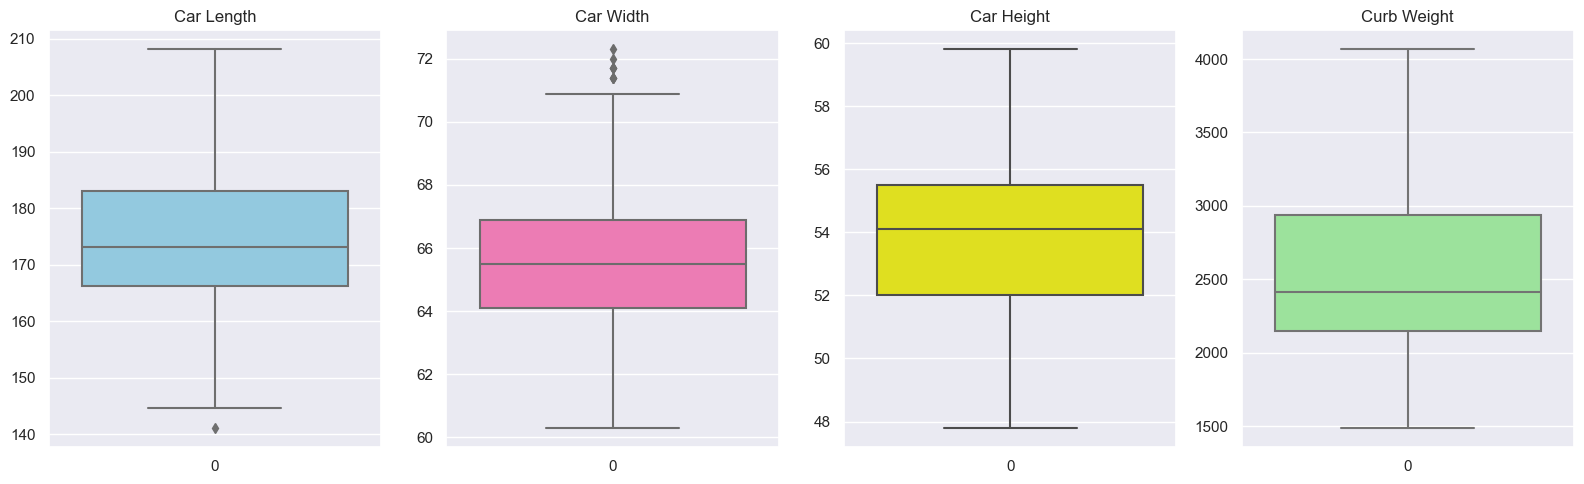

In [68]:
# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Create boxplots for math_score, reading_score, writing_score, and average
sns.boxplot(df['carlength'], color='skyblue', ax=axes[0])
sns.boxplot(df['carwidth'], color='hotpink', ax=axes[1])
sns.boxplot(df['carheight'], color='yellow', ax=axes[2])
sns.boxplot(df['curbweight'], color='lightgreen', ax=axes[3])

# Set titles for each subplot
axes[0].set_title('Car Length')
axes[1].set_title('Car Width')
axes[2].set_title('Car Height')
axes[3].set_title('Curb Weight')

# Display the plot
plt.tight_layout()
plt.show()

## 5) Model Training

### 5.1 Separate the independent variables (features) and the dependent variable (target).

In [69]:
X = df.drop(columns=['price'],axis=1)
X.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [70]:
y = df['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

### 5.2 Column Transformer for Feature Preprocessing with One-Hot Encoding and Standard Scaling

In [71]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [72]:
X = preprocessor.fit_transform(X)

In [73]:
X.shape

(205, 200)

### 5.3 Split the dataset into training and testing sets to evaluate the model's performance.

In [74]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((164, 200), (41, 200))

### 5.4 Create an Evaluate Function to give all metrics after model Training

In [75]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [76]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [77]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , 
    model_train_rmse, 
    model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , 
    model_test_rmse, 
    model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 355.9463
- Mean Absolute Error: 170.6200
- R2 Score: 0.9979
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13360.6667
- Mean Absolute Error: 7036.8225
- R2 Score: -1.2612


Lasso
Model performance for Training set
- Root Mean Squared Error: 524.0296
- Mean Absolute Error: 343.8335
- R2 Score: 0.9954
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4014.4568
- Mean Absolute Error: 2429.9681
- R2 Score: 0.7959


Ridge
Model performance for Training set
- Root Mean Squared Error: 1039.2587
- Mean Absolute Error: 795.0692
- R2 Score: 0.9819
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2957.8262
- Mean Absolute Error: 1951.6913
- R2 Score: 0.8892


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2713.9230
- Mean Absolute Error: 1662.4134
- R

In [78]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],
                                                             ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.956374
7,CatBoosting Regressor,0.934888
6,XGBRegressor,0.910401
8,AdaBoost Regressor,0.909254
2,Ridge,0.889178
4,Decision Tree,0.883915
1,Lasso,0.795857
3,K-Neighbors Regressor,0.720811
0,Linear Regression,-1.261190


## We Will use Random Forest Regressor

### 5.5 **Initialize and train the model**: Create an instance of the **Random Forest Regressor** and fit it to the training data.

In [79]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### 5.6 **Make predictions**: Use the trained model to make predictions on the test data.

In [80]:
y_pred = rf_model.predict(X_test)

In [81]:
pred_df = pd.DataFrame({'Actual Value': y_test,
                        'Predicted Value': y_pred, 
                        'Difference': y_test - y_pred})
print(pred_df)


     Actual Value  Predicted Value  Difference
15      30760.000        35970.910   -5210.910
9       17859.167        19162.910   -1303.743
100      9549.000         8971.190     577.810
132     11850.000        12964.150   -1114.150
68      28248.000        27153.115    1094.885
95       7799.000         6464.560    1334.440
159      7788.000         7893.500    -105.500
162      9258.000         8039.210    1218.790
147     10198.000         9617.830     580.170
182      7775.000         8225.440    -450.440
191     13295.000        13738.360    -443.360
164      8238.000         7931.940     306.060
65      18280.000        13869.120    4410.880
175      9988.000        10904.080    -916.080
73      40960.000        38283.200    2676.800
152      6488.000         6421.960      66.040
18       5151.000         5698.470    -547.470
82      12629.000        14103.280   -1474.280
86       8189.000         8949.270    -760.270
143      9960.000         9326.310     633.690
60       8495

In [82]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error (MSE): 3628565.32
R-squared (R2) Score: 0.95


<div class="alert alert-block alert-info"> <h3>📌Conclusion:</h3> <br>
<p style='color:black;'>

- In conclusion, the Random Forest Regressor model achieved a high R2 score of **`0.95`**, indicating that it can effectively predict car prices based on the given features. 
- Additionally, the relatively low MSE value suggests that the **model has good accuracy in estimating the car prices**. Overall, the model demonstrates strong performance and can be considered reliable for predicting car prices in the dataset.
    
</p>
</div>
